In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting = 3) #3 means ignoring double quotes 

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#Impoorting required packages
import re
#dopwnloading Stopwords list
import nltk
nltk.download('stopwords')
#importing stopwords
from nltk.corpus import stopwords
#importing stemming package
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91986\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#Cleaning the texts
#Removing puncutations, and number
#^ represents don't want to remove
#Keeping the letters a to z and A to Z with space
#collection of text is called as corpus
#Creating the Bag of words model
corpus = []
for i in range(0,1000):
    
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    
    #putting all letters in lower case
    review = review.lower()
    
    #Removing stopwords from string and stemming the word
    
    #Stemming is used for make the words to normal form (root) like loved will become like love, loving will become love and capital letter of first letter will become small
    #Stemming is taking of root of the word
    
    review = review.split()
    
    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    #Joining the words to make a string
    
    review =' '.join(review)
    corpus.append(review)

In [7]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [9]:
#Tokenization is the process of taking all words of the review and making them one column for each word
from sklearn.feature_extraction.text import CountVectorizer
#max_features is used to remove non relavent words
cv = CountVectorizer(max_features = 1500)
#Spars metrics in NLP
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

In [10]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
#Naive bayes, decission tree, and random forest common models for NLP
#Fitting naive Bayes to the train set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
#Predictions
y_pred = classifier.predict(X_test)

In [13]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[55, 42],
       [12, 91]], dtype=int64)

In [15]:
#Accuracy
(55+91)/200

0.73

In [17]:
from mlxtend.plotting import plot_confusion_matrix

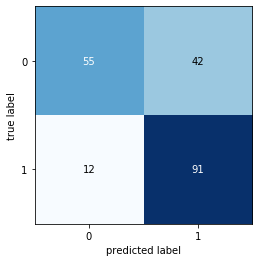

In [18]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

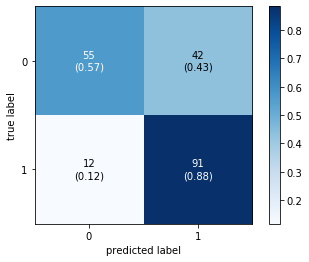

In [21]:
fig, ax = plot_confusion_matrix(conf_mat=cm,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

In [34]:
#Naive bayes, decission tree, and random forest common models for NLP
#Fitting Decission tree to the train set
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
#Predictions
y_pred_dtree = dtree.predict(X_test)

In [36]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

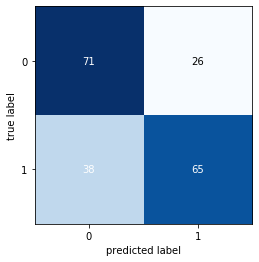

In [37]:
fig, ax = plot_confusion_matrix(conf_mat=cm_dtree)
plt.show()

In [38]:
#Accuracy
(71+65)/200

0.68